# Regresión Lineal
Fuente: https://www.datacamp.com/tutorial/essentials-linear-regression-python


Un caso práctico en Python

Para este estudio de caso, en primer lugar, se utilizará la biblioteca [Statsmodel](https://www.statsmodels.org/stable/index.html) para Python. Se trata de una biblioteca muy popular que proporciona clases y funciones para la estimación de muchos modelos estadísticos diferentes, así como para la realización de pruebas estadísticas y la exploración estadística de datos. Para los datos, se utilizará el famoso conjunto de datos [Boston House](https://www.kaggle.com/c/boston-housing). El poderoso scikit-learn viene con este conjunto de datos, por lo que no es necesario descargarlo por separado.

Comencemos el caso de estudio importando la librería `statsmodels` y su conjunto de datos:

In [1]:
import statsmodels.api as sm
from sklearn import datasets


from sklearn.datasets import fetch_california_housing
data = fetch_california_housing()


Scikit-learn proporciona una descripción práctica del conjunto de datos, y se puede ver fácilmente por:

In [2]:
print(data.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce


Ahora, antes de aplicar la regresión lineal, tendrá que preparar los datos y segregar las características y la etiqueta del conjunto de datos. `MEDV` (valor medio de la vivienda) es la etiqueta en este caso. Puede acceder a las características del conjunto de datos utilizando el atributo `feature_names`.

In [3]:
# Pandas and NumPy import
import numpy as np
import pandas as pd

# Set the features
df = pd.DataFrame(data.data, columns=data.feature_names)

# Set the target
target = pd.DataFrame(data.target, columns=["MEDV"])


Llegados a este punto, debes tener en cuenta algunas cosas importantes sobre la regresión lineal antes de aplicarla a los datos. Podrías haber estudiado esto antes en este tutorial, pero estudiar estos factores en este momento concreto te ayudará a hacerte una idea real.

- **Suposición lineal**: La regresión lineal se emplea mejor para capturar la relación entre las variables de entrada y las de salida. Para ello, la regresión lineal asume que esta relación es lineal (lo que puede no ser el caso todo el tiempo). Pero siempre se pueden transformar los datos para mantener la relación lineal. Por ejemplo, si sus datos tienen una relación exponencial, puede aplicar una [transformación logarítmica](https://www.dummies.com/programming/big-data/data-science/data-science-using-python-to-modify-data-distributions) para que la relación sea lineal.

- **Colinealidad entre las características**: La colinealidad es una medida para calcular matemáticamente la importancia de una característica de un conjunto de datos. Cuando se tiene un conjunto de datos en el que las características están muy correlacionadas entre sí, la regresión lineal no consigue aproximar la relación adecuadamente y tiende a sobreajustarse. Por lo tanto, es eficaz detectar las características muy correlacionadas y eliminarlas antes de aplicar la regresión lineal. Si quieres saber más sobre esto, no dudes en consultar [este excelente kernel de Kaggle](https://www.kaggle.com/robertoruiz/dealing-with-multicollinearity).

Ten en cuenta que Statsmodels no añade un término constante (el factor $\theta_0$) por defecto. Veámoslo primero sin el término constante en su modelo de regresión:


In [4]:
X = df["MedInc"]
y = target["MEDV"]

# Fit and make the predictions by the model
model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   MEDV   R-squared (uncentered):                   0.868
Model:                            OLS   Adj. R-squared (uncentered):              0.868
Method:                 Least Squares   F-statistic:                          1.357e+05
Date:                Fri, 27 Sep 2024   Prob (F-statistic):                        0.00
Time:                        10:21:28   Log-Likelihood:                         -26188.
No. Observations:               20640   AIC:                                  5.238e+04
Df Residuals:                   20639   BIC:                                  5.239e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
MedInc         0.5118      0.001    368.395      0.000       0.509       0.515
==============================================================================
Omnibus:                     3633.023   Durbin-Watson:                   0.795
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9249.629
Skew:                           0.974   Prob(JB):                         0.00
Kurtosis:                       5.638   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

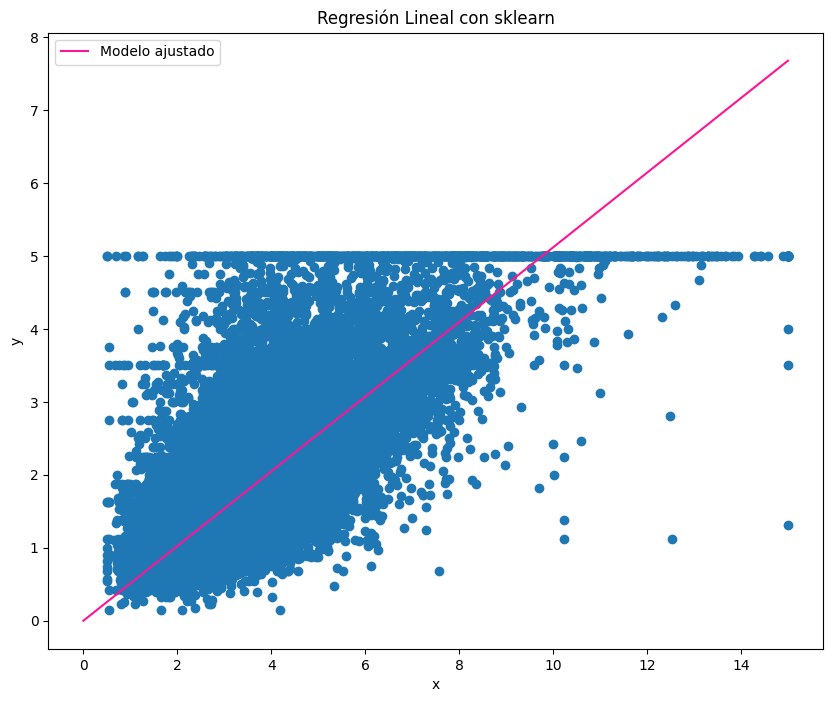

In [5]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))

X_rango = np.linspace(0, np.max(X), 500) # para graficar

plt.plot(X, y, 'o')


y_ra_p = model.predict(X_rango)
plt.plot(X_rango, y_ra_p, 'deeppink', label='Modelo ajustado')
plt.xlabel('x')
plt.ylabel('y')
plt.title(f'Regresión Lineal con sklearn')
plt.legend()
plt.show()

 - Se está utilizando el método OLS (Mínimos Cuadrados Ordinarios) para entrenar su modelo de regresión lineal.

 - Hay un valor que corresponde a **R-cuadrado**. R-cuadrado es el «porcentaje de varianza explicada» por el modelo. Es decir, R-cuadrado es la fracción en la que la varianza de los errores es menor que la varianza de la variable dependiente. Los valores de R-cuadrado oscilan entre 0 y 1 y suelen expresarse como porcentajes del 0% al 100%. R-cuadrado dará una estimación de la relación entre los movimientos de una variable dependiente en función de los movimientos de una variable independiente. No dirá si el modelo elegido es bueno o malo, ni si los datos y las predicciones están sesgados. Una R-cuadrado alta o baja no es necesariamente buena o mala, ya que no indica la fiabilidad del modelo ni si se ha elegido la regresión correcta. Se puede obtener un R-cuadrado bajo para un buen modelo, o un R-cuadrado alto para un modelo mal ajustado, y viceversa.
 - El coeficiente (coef) de 0.5118 significa que si la variable MedInc aumenta en 1, el valor previsto del MEDV aumenta en 0.5118.
 - Existe un intervalo de confianza del 95% para el MedInc, lo que significa que el modelo predice con un 95% de confianza que el valor del AveRooms se sitúa entre 0.509 y 0.515.

Se puede añadir fácilmente un término constante al modelo de regresión lineal. Puede hacerlo mediante `X = sm.add_constant(X)` (X es el nombre del marco de datos que contiene las variables de entrada (variables independientes).

In [6]:
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.473
Model:                            OLS   Adj. R-squared:                  0.473
Method:                 Least Squares   F-statistic:                 1.856e+04
Date:                Fri, 27 Sep 2024   Prob (F-statistic):               0.00
Time:                        10:21:30   Log-Likelihood:                -25623.
No. Observations:               20640   AIC:                         5.125e+04
Df Residuals:                   20638   BIC:                         5.127e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4509      0.013     34.082      0.000       0.425       0.477
MedInc         0.4179      0.003    136.223      0.000       0.412       0.424
==============================================================================
Omnibus:                     4245.795   Durbin-Watson:                   0.655
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9273.446
Skew:                           1.191   Prob(JB):                         0.00
Kurtosis:                       5.260   Cond. No.                         10.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

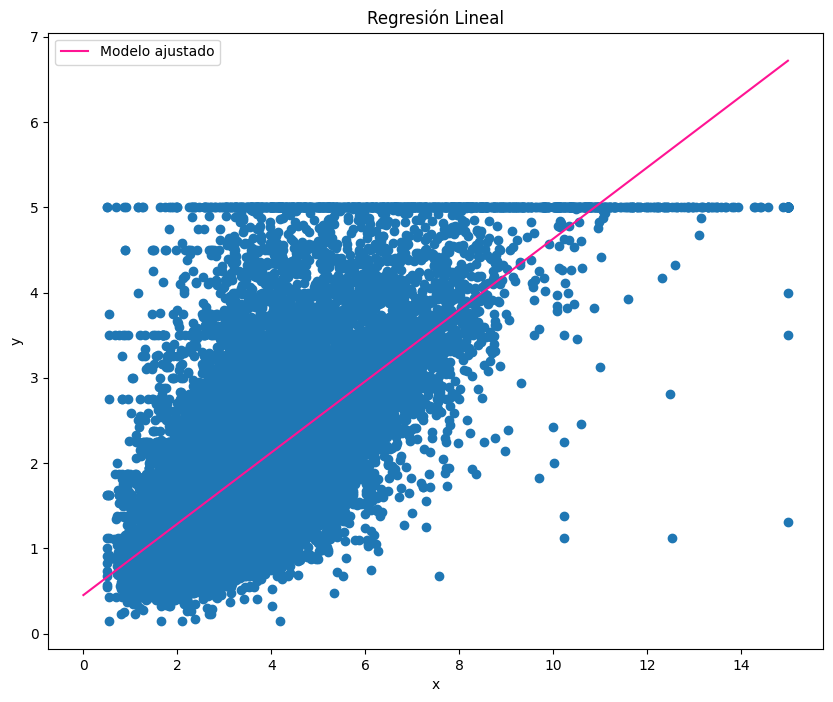

In [7]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))

X_rango = np.linspace(0, np.max(X), 500) # para graficar
X_rango = sm.add_constant(X_rango) # add a constant to X_rango

plt.plot(X.loc[:,'MedInc'], y, 'o')

y_ra_p = model.predict(X_rango)
plt.plot(X_rango[:,1], y_ra_p, 'deeppink', label='Modelo ajustado')
plt.xlabel('x')
plt.ylabel('y')
plt.title(f'Regresión Lineal')
plt.legend()
plt.show()

Este modelo tiene un valor R-cuadrado menor: 0,473, lo que significa esencialmente que este modelo capta el 47.3% de la varianza de la variable dependiente.

Ahora, intentemos averiguar la relación entre todas las variables y el valor medio de la vivienda.

In [8]:
X = df#[["AveRooms", "MedInc"]]
y = target["MEDV"]

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   MEDV   R-squared (uncentered):                   0.892
Model:                            OLS   Adj. R-squared (uncentered):              0.892
Method:                 Least Squares   F-statistic:                          2.137e+04
Date:                Fri, 27 Sep 2024   Prob (F-statistic):                        0.00
Time:                        10:21:30   Log-Likelihood:                         -24087.
No. Observations:               20640   AIC:                                  4.819e+04
Df Residuals:                   20632   BIC:                                  4.825e+04
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
MedInc         0.5135      0.004    120.594      0.000       0.505       0.522
HouseAge       0.0157      0.000     33.727      0.000       0.015       0.017
AveRooms      -0.1825      0.006    -29.673      0.000      -0.195      -0.170
AveBedrms      0.8651      0.030     28.927      0.000       0.806       0.924
Population  7.792e-06   5.09e-06      1.530      0.126   -2.19e-06    1.78e-05
AveOccup      -0.0047      0.001     -8.987      0.000      -0.006      -0.004
Latitude      -0.0639      0.004    -17.826      0.000      -0.071      -0.057
Longitude     -0.0164      0.001    -14.381      0.000      -0.019      -0.014
==============================================================================
Omnibus:                     4353.392   Durbin-Watson:                   0.909
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            14087.489
Skew:                           1.069   Prob(JB):                         0.00
Kurtosis:                       6.436   Cond. No.                     1.03e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.03e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""